In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats

In [2]:
tb1 = pd.read_excel('regr.xlsx')
tb1

,TV Ads,car Sold
0,1,14
1,3,24
2,2,18
3,1,17
4,3,27


In [3]:
t = tb1['TV Ads']
c = tb1['car Sold']

In [5]:
import statsmodels.api as sm
t = sm.add_constant(t)
model1 = sm.OLS(c, t) #ols = ordinaty least square method
result1 = model1.fit()
result1.summary()

F:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
F:\anaconda\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               car Sold   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     21.43
Date:                Tue, 08 Mar 2022   Prob (F-statistic):             0.0190
Time:                        08:38:09   Log-Likelihood:                -9.6687
No. Observations:                   5   AIC:                             23.34
Df Residuals:                       3   BIC:                             22.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0000      2.366      4.226      0.024       2.469      17.531
TV Ads         5.0000      1.080      4.629      0.019       1.563       8.437
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.214
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.674
Skew:                           0.256   Prob(JB):                        0.714
Kurtosis:                       1.276   Cond. No.                         6.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Confidence / Prediction Interval

In [6]:
from statsmodels.stats.outliers_influence import summary_table

st, data1, ss2 = summary_table(result1, alpha = .05)
fittedvalues = data1[:, 2]
predict_mean_se = data1[:, 3]
predict_mean_ci_low, predict_mean_ci_upp = data1[:, 4:6].T #ci = confidence interval
predict_ci_low, predict_ci_upp = data1[:, 6:8].T

### Confidence Interval

In [7]:
predict_mean_ci_low #ci lower limit

array([10.38819716, 20.38819716, 16.92546477, 10.38819716, 20.38819716])

In [9]:
predict_mean_ci_upp #ci upper limit

array([19.61180284, 29.61180284, 23.07453523, 19.61180284, 29.61180284])

### Prediction Interval

In [8]:
predict_ci_low

array([ 6.72156055, 16.72156055, 12.4689575 ,  6.72156055, 16.72156055])

In [10]:
predict_ci_upp

array([23.27843945, 33.27843945, 27.5310425 , 23.27843945, 33.27843945])

F:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


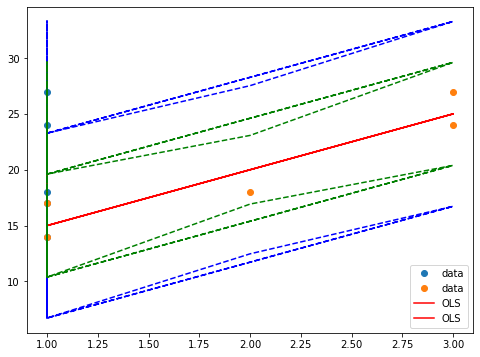

In [22]:
X = sm.add_constant(t)
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(t, c, 'o', label = "data")
ax.plot(X, fittedvalues, 'r-', label='OLS')
ax.plot(X, predict_ci_low, 'b--')
ax.plot(X, predict_ci_upp, 'b--')
ax.plot(X, predict_mean_ci_low, 'g--')
ax.plot(X, predict_mean_ci_upp, 'g--')
ax.legend(loc = 'best')
plt.show()

Graph incorrect, not according to video
#### Green: CI, Blue: PI